In [ ]:
pip install livelossplot

In [1]:
#all imports

import cv2
import numpy as np
import pandas as pd
#import mediapipe as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os.path
import sys
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
FLAGS = None

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Flatten,MaxPool2D,Activation,Dropout,Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix



#models
#from tensorflow.keras.applications.inception_v3

In [ ]:
print("Gpus:",tf.config.experimental.list_physical_devices('GPU'))

Gpus: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing and preparing data 

In [ ]:
!pwd
!ls

/content
drive  sample_data


In [3]:
!unzip "/content/drive/MyDrive/Indian Sign Language.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/V/819.jpg  
  inflating: /content/data/V/82.jpg  
  inflating: /content/data/V/820.jpg  
  inflating: /content/data/V/821.jpg  
  inflating: /content/data/V/822.jpg  
  inflating: /content/data/V/823.jpg  
  inflating: /content/data/V/824.jpg  
  inflating: /content/data/V/825.jpg  
  inflating: /content/data/V/826.jpg  
  inflating: /content/data/V/827.jpg  
  inflating: /content/data/V/828.jpg  
  inflating: /content/data/V/829.jpg  
  inflating: /content/data/V/83.jpg  
  inflating: /content/data/V/830.jpg  
  inflating: /content/data/V/831.jpg  
  inflating: /content/data/V/832.jpg  
  inflating: /content/data/V/833.jpg  
  inflating: /content/data/V/834.jpg  
  inflating: /content/data/V/835.jpg  
  inflating: /content/data/V/836.jpg  
  inflating: /content/data/V/837.jpg  
  inflating: /content/data/V/838.jpg  
  inflating: /content/data/V/839.jpg  
  inflating: /content/data/V/84.jpg  
  inflating: /co

In [4]:
#varaibles
imageSize=(224,224)
valid_split=0.2

train_path="/content/data"

In [5]:
#getting data from the data set ,use this method when train and validation data is splited
#use tf.keras.imagepreprocessinf.ImageDataGenerator() and flow_from_directory function to get the data 

datagen=ImageDataGenerator(rescale=1./255,
                           rotation_range=60,
                           width_shift_range=0.2, # Shifting image width by 20%
                           height_shift_range=0.2,# Shifting image height by 20%
                           shear_range=0.2,       # Shearing across X-axis by 20%
                           zoom_range=0.2,        # Image zooming by 20%
                           horizontal_flip=True,
                           vertical_flip=True,
                           fill_mode='nearest',
                           validation_split=valid_split
                           )


train_data=datagen.flow_from_directory(train_path,
                                       target_size=imageSize,
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       subset="training",
                                       shuffle=True
                                      )
validation_data=datagen.flow_from_directory(train_path,
                                            target_size=imageSize,
                                            color_mode="rgb",
                                            class_mode="categorical",
                                            subset="validation",
                                            shuffle=True)


Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


In [6]:
print(type(train_data),type(validation_data))
print(train_data.class_indices)
print("No of elements in train_data",train_data.samples)
print("no of lements in validation data:",validation_data.samples)


<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'> <class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
No of elements in train_data 33600
no of lements in validation data: 8400


In [7]:
#variables
#varaibles
imageSize=(224,224)
valid_split=0.2
train_path="/content/data"
batchSize=32
train_num=train_data.samples
valid_num=validation_data.samples

# BaseLine model

## build and train model

In [ ]:
#initialize the cnn model
base_model=Sequential()

#First cnn layer with 32 
base_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
base_model.add(Conv2D(32, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(Conv2D(64, (3, 3),  activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(128, (3, 3),activation='relu'))
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(256, (3, 3), activation='relu'))
base_model.add(Conv2D(256, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten())
base_model.add(Dense(256, activation='relu'))
base_model.add(Dropout(0.25))

base_model.add(Dense(256, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(len(train_data.class_indices),activation='softmax'))

#compile the base class 

base_model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




NameError: ignored

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 128)       7

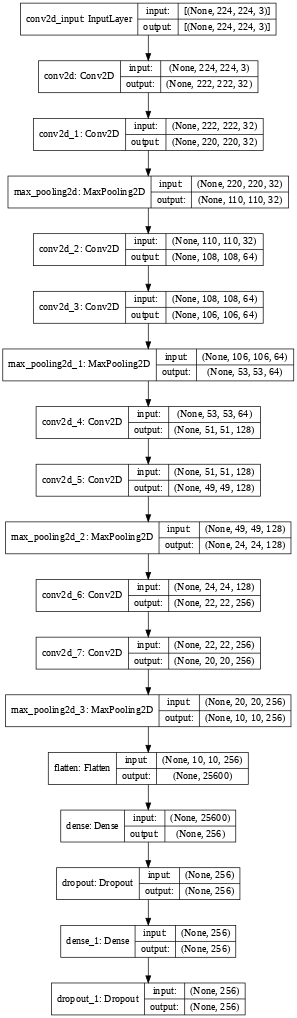

In [ ]:
tf.keras.utils.plot_model(
    base_model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=50,
)

In [ ]:
base_history=base_model.fit_generator(train_data,
                                       steps_per_epoch = train_num//batchSize,
                                       epochs=10,
                                       validation_data=validation_data,
                                       validation_steps=validation_data.samples//batchSize,
                                       verbose=1,
                                       #callbacks=[PlotLossesKeras()],
                                       workers=10,
                                       max_queue_size=100
                          )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1200/1200 [==============================] - 460s 379ms/step - loss: 2.2625 - accuracy: 0.2950 - val_loss: 0.9604 - val_accuracy: 0.7099
Epoch 2/10
1200/1200 [==============================] - 448s 371ms/step - loss: 1.1524 - accuracy: 0.5990 - val_loss: 0.4077 - val_accuracy: 0.8558
Epoch 3/10
1200/1200 [==============================] - 438s 363ms/step - loss: 0.6480 - accuracy: 0.7650 - val_loss: 0.3243 - val_accuracy: 0.8655
Epoch 4/10
1200/1200 [==============================] - 437s 362ms/step - loss: 0.4147 - accuracy: 0.8415 - val_loss: 0.1937 - val_accuracy: 0.9098
Epoch 5/10
1200/1200 [==============================] - 446s 370ms/step - loss: 0.2927 - accuracy: 0.8856 - val_loss: 0.2140 - val_accuracy: 0.8933
Epoch 6/10
1200/1200 [==============================] - 454s 377ms/step - loss: 0.2324 - accuracy: 0.9078 - val_loss: 0.1088 - val_accuracy: 0.9367
Epoch 7/10
1200/1200 [==============================] - 472s 392ms/step - loss: 0.1945 - accuracy: 0.9246 - val_

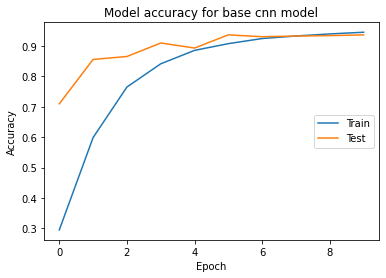

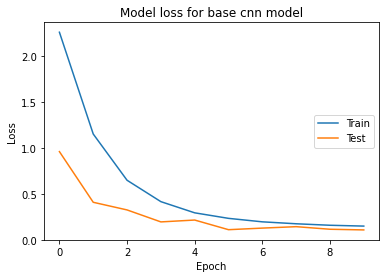

In [ ]:
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('Model accuracy for base cnn model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'center right')
plt.show()


plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.title('Model loss for base cnn model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()




In [ ]:
saved_model_path = "/content/drive/MyDrive/base_model"
base_model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/base_model/assets


## evaluation and metrics

In [ ]:
base_model=tf.keras.models.load_model('/content/drive/MyDrive/base_model')

In [ ]:
base_model.evaluate_generator(
    generator=validation_data,
    steps=valid_num//batchSize
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.11090469360351562, 0.9355142116546631]

In [ ]:
test_data=datagen.flow_from_directory(train_path,
                                      target_size=imageSize,
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=False)

Found 9585 images belonging to 37 classes.


In [ ]:
Y_pred = vgg16_model.predict_generator(test_data, valid_num // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_mtx=confusion_matrix(test_data.classes, y_pred)
print(confusion_mtx)
print('Classification Report')
target_names = list(test_data.class_indices.keys())
print(classification_report(test_data.classes, y_pred, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[232   0   0 ...   0   0   0]
 [  0 233   3 ...   0   0   0]
 [  0   4 208 ...   0   0   0]
 ...
 [  0   0   0 ... 239   0   0]
 [  0   0   0 ...   0 578  22]
 [  0   0   0 ...   0  88 512]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       239
           2       0.98      0.97      0.98       239
           3       0.98      0.87      0.92       240
           4       0.90      1.00      0.94       240
           5       1.00      1.00      1.00       240
           6       0.95      1.00      0.97       240
           7       1.00      1.00      1.00       240
           8       1.00      0.99      0.99       240
           9       0.99      0.98      0.99       240
           A       0.99      1.00      1.00       240
           B       1.00      1.00      1.00       240
           C       1.00      0.99      0.99       240
           D       0.99      1.00      1.00       240
           E

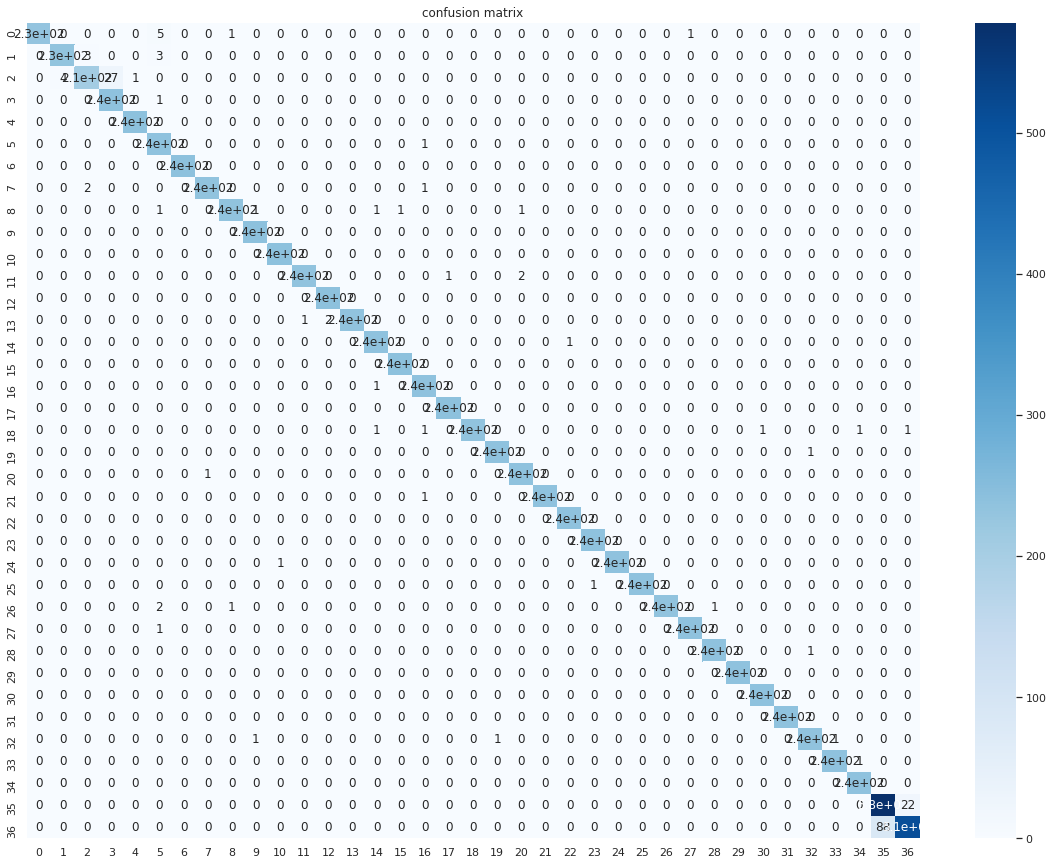

In [ ]:
#plotting the heatmap
sns.set()
fig=plt.gcf()
fig.set_size_inches(20,15)
#plot_confusion_matrix(confusion_mtx, labels= target_names)

sns.heatmap(confusion_mtx,annot=True,cmap='Blues')
plt.title("confusion matrix")
plt.show()

# VGG16

## import and training

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
for layer in vgg16_model.layers:
  layer.trainable=False

In [ ]:
last_output = vgg16_model.layers[-1].output

x=Flatten()(last_output)

x=Dense(512,activation='relu')(x)

x=Dropout(0.25)(x)

x=Dense(256,activation='relu')(x)

x=Dropout(0.5)(x)

x=Dense(len(train_data.class_indices),activation='softmax')(x)

vgg16_model=Model(vgg16_model.input,x)

vgg16_model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
vgg16_model.summary()

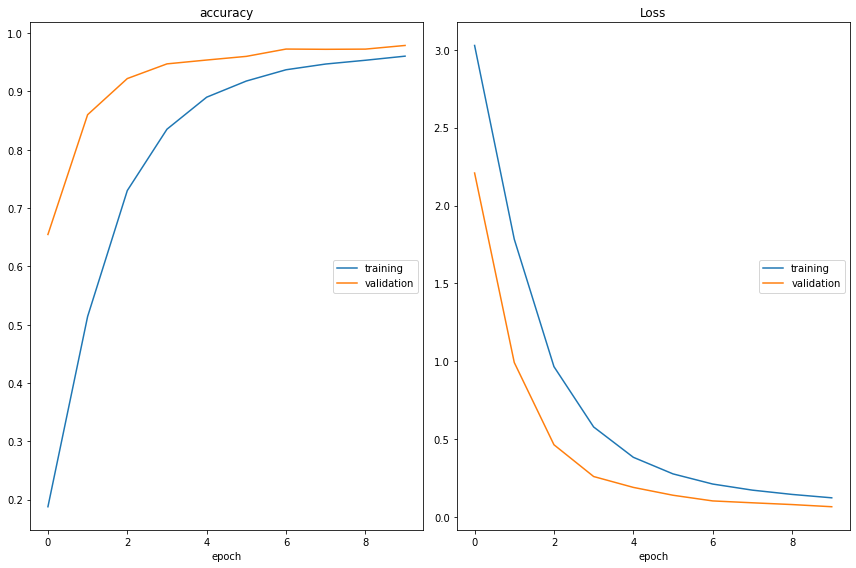

accuracy
	training         	 (min:    0.188, max:    0.961, cur:    0.961)
	validation       	 (min:    0.655, max:    0.979, cur:    0.979)
Loss
	training         	 (min:    0.124, max:    3.028, cur:    0.124)
	validation       	 (min:    0.067, max:    2.209, cur:    0.067)


In [ ]:
#train the model

vgg16_history=vgg16_model.fit_generator(train_data,
                          steps_per_epoch=train_num//batchSize,
                          epochs=10,
                          validation_data=validation_data,
                          validation_steps=valid_num//batchSize,
                          callbacks=[PlotLossesKeras()]
                          )

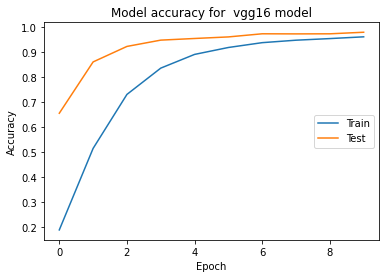

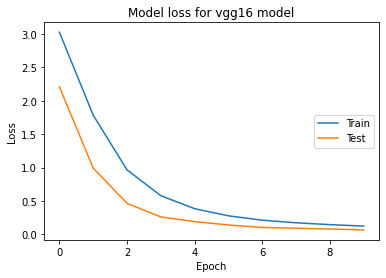

In [ ]:
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('Model accuracy for  vgg16 model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'center right')
plt.show()


plt.plot(vgg16_history.history['loss'])
plt.plot(vgg16_history.history['val_loss'])
plt.title('Model loss for vgg16 model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
vgg16_save_path="/content/drive/MyDrive/vgg16_model"
vgg16_model.save(vgg16_save_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/vgg16_model/assets


## Evaluation and metrics

In [ ]:
vgg16_model=tf.keras.model.load_model("/content/drive/MyDrive/vgg16_model")

In [ ]:
test_data=datagen.flow_from_directory(train_path,
                                      target_size=imageSize,
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=False)

Found 9585 images belonging to 37 classes.


In [ ]:
Y_pred = vgg16_model.predict_generator(test_data, valid_num // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_mtx=confusion_matrix(test_data.classes, y_pred)
print(confusion_mtx)
print('Classification Report')
target_names = list(test_data.class_indices.keys())
print(classification_report(test_data.classes, y_pred, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[229   2   0 ...   0   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   2 211 ...   0   0   0]
 ...
 [  0   0   0 ... 239   0   0]
 [  0   0   0 ...   0 573  26]
 [  0   0   0 ...   0  92 507]]
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       239
           2       0.98      0.99      0.99       239
           3       0.99      0.88      0.93       240
           4       0.89      0.99      0.94       240
           5       1.00      1.00      1.00       240
           6       0.95      0.99      0.97       240
           7       1.00      1.00      1.00       240
           8       0.99      1.00      0.99       240
           9       0.97      0.98      0.98       240
           A       0.98      1.00      0.99       240
           B       1.00      1.00      1.00       240
           C       1.00      0.99      0.99       240
           D       0.99      1.00      0.99       240
           E

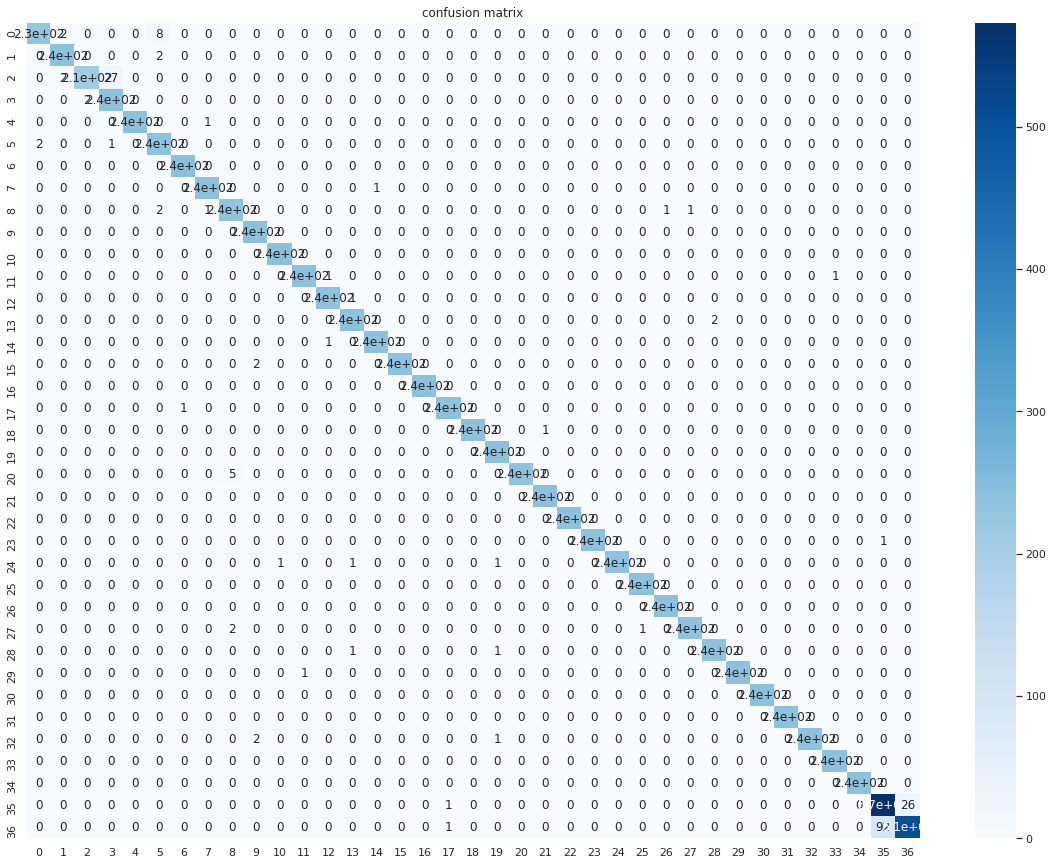

In [ ]:
#plotting the heatmap
sns.set()
fig=plt.gcf()
fig.set_size_inches(20,15)
#plot_confusion_matrix(confusion_mtx, labels= target_names)

sns.heatmap(confusion_mtx,annot=True,cmap='Blues')
plt.title("confusion matrix")
plt.show()


# Inception v3 model

## import and train model

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inceptionv3_model=InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3))

87916544/87910968 [==============================] - 1s 0us/step


In [9]:
#freeze all the layers of the incpetion model
for layer in inceptionv3_model.layers:
  layer.trainable=False

In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
#https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b

last_output = inceptionv3_model.layers[-1].output

x=layers.Flatten()(last_output)

x=layers.Dense(2048,activation='relu')(x)

x=layers.Dropout(0.25)(x)

x=layers.Dense(2048,activation='relu')(x)

x=layers.Dropout(0.5)(x)

x=layers.Dense(len(train_data.class_indices),activation='softmax')(x)   # softmax

inceptionv3_model=Model(inceptionv3_model.input,x)

inceptionv3_model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training and testing

In [11]:
inception_history=inceptionv3_model.fit_generator(train_data,
                            steps_per_epoch=train_data.samples/batchSize,
                            epochs=10,
                            validation_data=validation_data,
                            validation_steps=validation_data.samples/batchSize,
                            verbose=1,
                            use_multiprocessing=True,
                            workers=4
                  
                  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1050/1050 [==============================] - 530s 470ms/step - loss: 0.9669 - accuracy: 0.7560 - val_loss: 0.1812 - val_accuracy: 0.9499
Epoch 2/10
1050/1050 [==============================] - 538s 511ms/step - loss: 0.2516 - accuracy: 0.9369 - val_loss: 0.0966 - val_accuracy: 0.9737
Epoch 3/10
1050/1050 [==============================] - 543s 516ms/step - loss: 0.1866 - accuracy: 0.9568 - val_loss: 0.0519 - val_accuracy: 0.9849
Epoch 4/10
1050/1050 [==============================] - 494s 469ms/step - loss: 0.1636 - accuracy: 0.9657 - val_loss: 0.0655 - val_accuracy: 0.9864
Epoch 5/10
1050/1050 [==============================] - 497s 471ms/step - loss: 0.1374 - accuracy: 0.9713 - val_loss: 0.0452 - val_accuracy: 0.9896
Epoch 6/10
1050/1050 [==============================] - 490s 465ms/step - loss: 0.1292 - accuracy: 0.9764 - val_loss: 0.0825 - val_accuracy: 0.9865
Epoch 7/10
1050/1050 [==============================] - 489s 464ms/step - loss: 0.1279 - accuracy: 0.9774 - val_

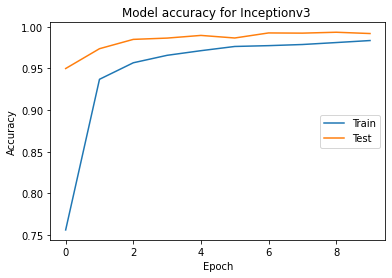

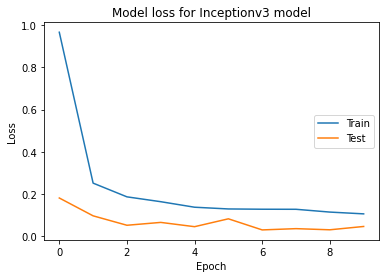

In [12]:
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.title('Model accuracy for Inceptionv3 ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'center right')
plt.show()


plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('Model loss for Inceptionv3 model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
saved_model_path = "/content/drive/MyDrive/inceptionv3_model"
inceptionv3_model.save(saved_model_path)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/inceptionv3_model/assets


## evaluation and metrics

In [ ]:
inceptionv3_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/inceptionv3_model')

In [ ]:
inceptionv3_model.evaluate_generator(
    generator=validation_data,
    steps=valid_num//batchSize
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.08618487417697906, 0.97826087474823]

In [ ]:
test_data=datagen.flow_from_directory(train_path,
                                      target_size=imageSize,
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=False)

Found 9585 images belonging to 37 classes.


In [ ]:

Y_pred = inceptionv3_model.predict_generator(test_data, valid_num // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_mtx=confusion_matrix(test_data.classes, y_pred)
print(confusion_mtx)
print('Classification Report')
target_names = list(test_data.class_indices.keys())
print(classification_report(test_data.classes, y_pred, target_names=target_names))




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[239   0   0 ...   0   0   0]
 [  6 233   0 ...   0   0   0]
 [  0   8 213 ...   0   0   0]
 ...
 [  0   0   0 ... 239   0   0]
 [  0   0   0 ...   0 555  45]
 [  0   0   0 ...   0  74 525]]
Classification Report
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       239
           2       0.97      0.97      0.97       239
           3       1.00      0.89      0.94       240
           4       0.93      1.00      0.97       240
           5       1.00      0.96      0.98       240
           6       0.99      1.00      0.99       240
           7       1.00      1.00      1.00       240
           8       0.98      0.98      0.98       240
           9       0.99      1.00      0.99       240
           A       1.00      1.00      1.00       240
           B       1.00      1.00      1.00       240
           C       1.00      1.00      1.00       240
           D       1.00      1.00      1.00       240
           E

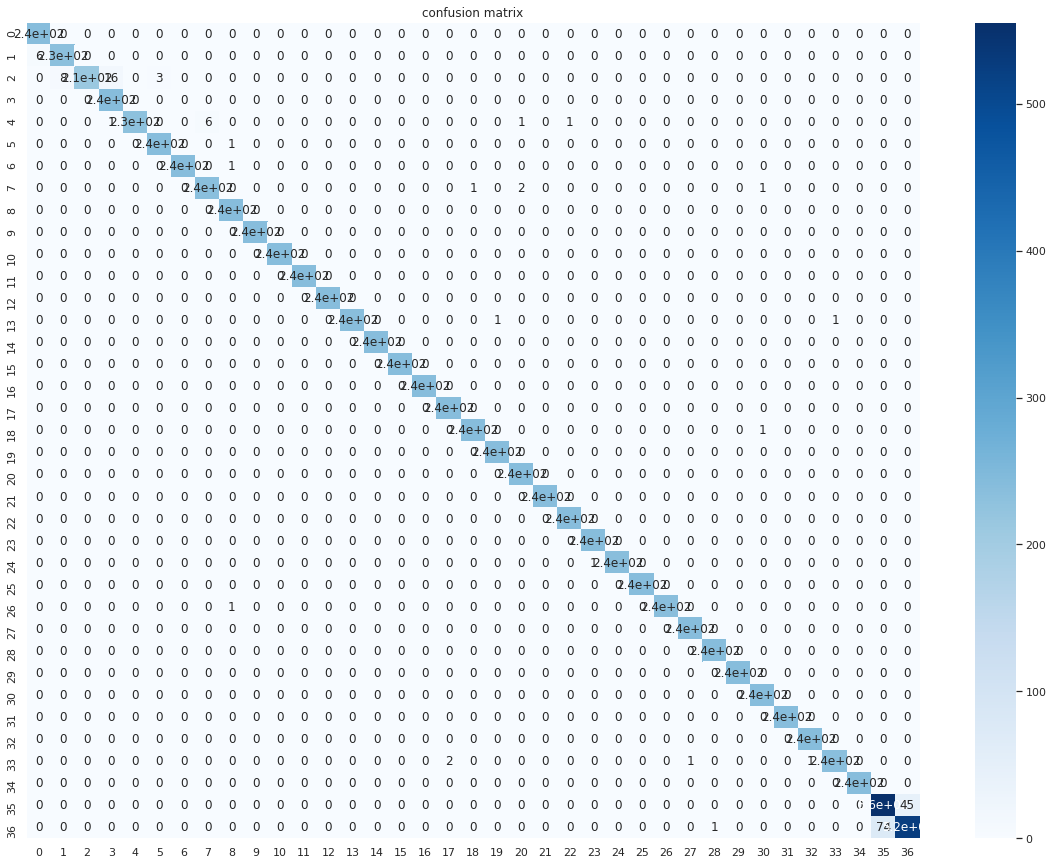

In [ ]:
#plotting the heatmap
sns.set()
fig=plt.gcf()
fig.set_size_inches(20,15)
sns.heatmap(confusion_mtx,annot=True,cmap='Blues')
plt.title("confusion matrix")
plt.show()

## prediciton for unseen data

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/sign_recognizer')

In [ ]:
sign_dict={'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}

sign_dict={v:k for k,v in sign_dict.items()}

In [ ]:
test_path="/content/drive/MyDrive/Colab Notebooks/Indian/test"

test_images=[]
test_label=[]
test_dict={}
for files in os.listdir(test_path):
  test_images.append(os.path.join(test_path,files))
  test_label.append(str(files)[0])

print(test_label)
print("no of images in test folder:",len(test_label))

['1', '2', '3', '4', '6', '5', '7', '8', '9', 'B', 'A', 'C', 'D', 'F', 'G', 'E', 'H', 'I', 'J', 'K', 'M', 'L', 'N', 'O', 'R', 'Q', 'P', 'T', 'S', 'U', 'V', 'Y', 'X', 'W', 'Z']
no of images in test folder: 35


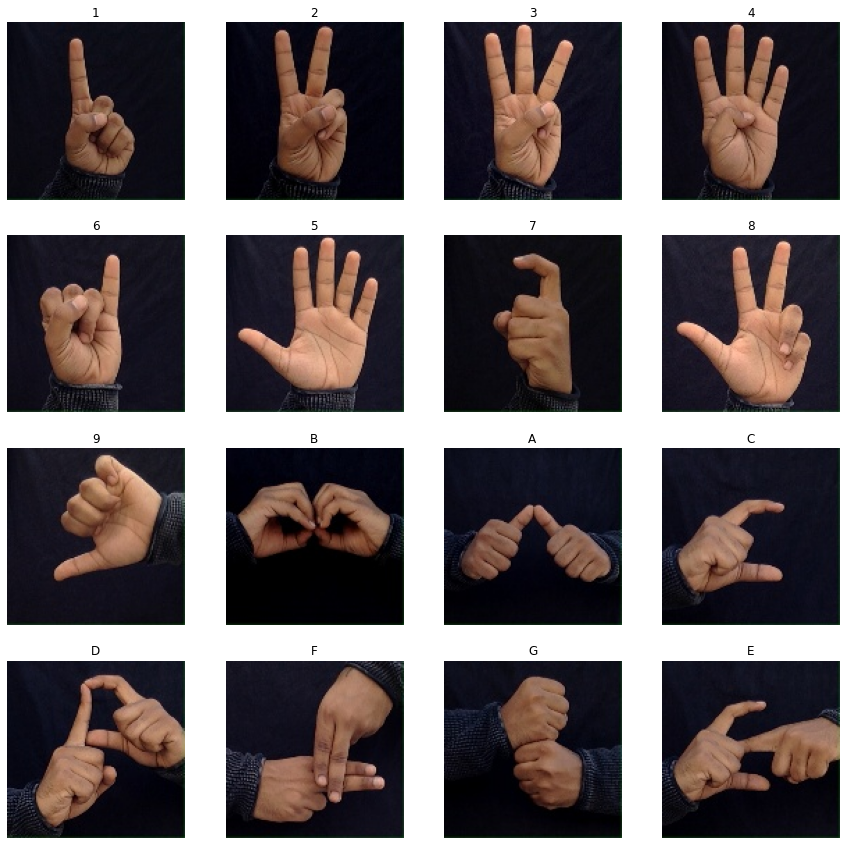

In [ ]:
fig=plt.figure(figsize=(15,15))
for i in range(16):
  img=cv2.imread(test_images[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  fig.add_subplot(4,4,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(test_label[i])

In [ ]:
predicted_output=[]
def predict_sign(img):
  img=cv2.resize(img,(150,150))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=np.array([img])/255.
  predictions = model.predict(img)
  result=predictions.tolist()[0]
  position=result.index(max(result))
  return sign_dict[position]


for file in test_images:
  img=cv2.imread(file)
  predicted_output.append(str(predict_sign(img)))


print("predicted","\t\t","actual")
accuracy_score=0
for i in range(len(predicted_output)):
  if predicted_output[i]==test_label[i]:
    accuracy_score+=1
  print(predicted_output[i],"\t\t",test_label[i])

print(accuracy_score/len(predicted_output))




predicted 		 actual
1 		 1
2 		 2
3 		 3
4 		 4
6 		 6
5 		 5
7 		 7
8 		 8
9 		 9
B 		 B
A 		 A
C 		 C
D 		 D
R 		 F
G 		 G
E 		 E
H 		 H
I 		 I
J 		 J
K 		 K
M 		 M
L 		 L
N 		 N
O 		 O
R 		 R
Q 		 Q
P 		 P
T 		 T
S 		 S
U 		 U
V 		 V
Y 		 Y
X 		 X
W 		 W
Z 		 Z
0.9714285714285714


# Mobilenetv2 model

## Import the model

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenetv2_model=MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
mobilenetv2_model.trainable=False
mobilenetv2_model.summary()

In [ ]:
x = mobilenetv2_model.output

x = GlobalAveragePooling2D()(x)
 
x=Flatten()(x)  #flatten the layer

x=Dense(1280,activation='relu')(x) # fully connected layer

x=Dropout(0.25)(x)  #25% dropout

x=Dense(1280,activation='relu')(x) #fully connected layer

x=Dropout(0.5)(x) #50 % dropout

x=Dense(len(train_data.class_indices),activation='softmax')(x)   

mobilenetv2_model=Model(mobilenetv2_model.input,x)

mobilenetv2_model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
mobilenetv2_model.summary()

In [ ]:
mobilenetv2_history=mobilenetv2_model.fit_generator(train_data,
                                                    
                                                    steps_per_epoch=train_data.samples/batchSize,
                                                    epochs=10,
                                                    validation_data=validation_data,
                                                    validation_steps=validation_data.samples/batchSize,
                                                    verbose=1,
                                                    use_multiprocessing=True,
                                                    workers=4
                                                    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1200/1200 [==============================] - 522s 407ms/step - loss: 0.4107 - accuracy: 0.8907 - val_loss: 0.0503 - val_accuracy: 0.9803
Epoch 2/10
1200/1200 [==============================] - 427s 355ms/step - loss: 0.0463 - accuracy: 0.9847 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 3/10
1200/1200 [==============================] - 422s 350ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0.0325 - val_accuracy: 0.9873
Epoch 4/10
1200/1200 [==============================] - 421s 350ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9896
Epoch 5/10
1200/1200 [==============================] - 420s 349ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0341 - val_accuracy: 0.9879
Epoch 6/10
1200/1200 [==============================] - 423s 351ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0294 - val_accuracy: 0.9894
Epoch 7/10
1200/1200 [==============================] - 477s 397ms/step - loss: 0.0183 - accuracy: 0.9942 - val_

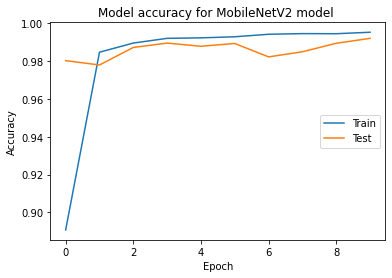

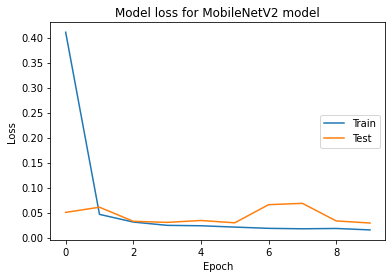

In [ ]:
plt.plot(mobilenetv2_history.history['accuracy'])
plt.plot(mobilenetv2_history.history['val_accuracy'])
plt.title('Model accuracy for MobileNetV2 model ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'center right')
plt.show()


plt.plot(mobilenetv2_history.history['loss'])
plt.plot(mobilenetv2_history.history['val_loss'])
plt.title('Model loss for MobileNetV2 model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
saved_model_path = "/content/drive/MyDrive/mobilenetv2_model"
mobilenetv2_model.save(saved_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/mobilenetv2_model/assets


## evaluation and metrics

In [ ]:
mobilenetv2_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/mobilenetv2_model')

In [ ]:
mobilenetv2_model.evaluate_generator(
    generator=validation_data,
    steps=valid_num//batchSize
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.027755366638302803, 0.991847813129425]

In [ ]:
test_data=datagen.flow_from_directory(train_path,
                                      target_size=imageSize,
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=False)

Found 9585 images belonging to 37 classes.


In [ ]:

Y_pred = mobilenetv2_model.predict_generator(test_data, valid_num // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_mtx=confusion_matrix(test_data.classes, y_pred)
print(confusion_mtx)
print('Classification Report')
target_names = list(test_data.class_indices.keys())
print(classification_report(test_data.classes, y_pred, target_names=target_names))




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[239   0   0 ...   0   0   0]
 [  0 237   2 ...   0   0   0]
 [  0   0 240 ...   0   0   0]
 ...
 [  0   0   0 ... 239   0   0]
 [  0   0   0 ...   0 558  42]
 [  0   0   0 ...   0  38 562]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       239
           2       1.00      0.99      1.00       239
           3       0.99      1.00      1.00       240
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       240
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       240
           9       1.00      1.00      1.00       240
           A       1.00      1.00      1.00       240
           B       1.00      1.00      1.00       240
           C       1.00      1.00      1.00       240
           D       1.00      1.00      1.00       240
           E

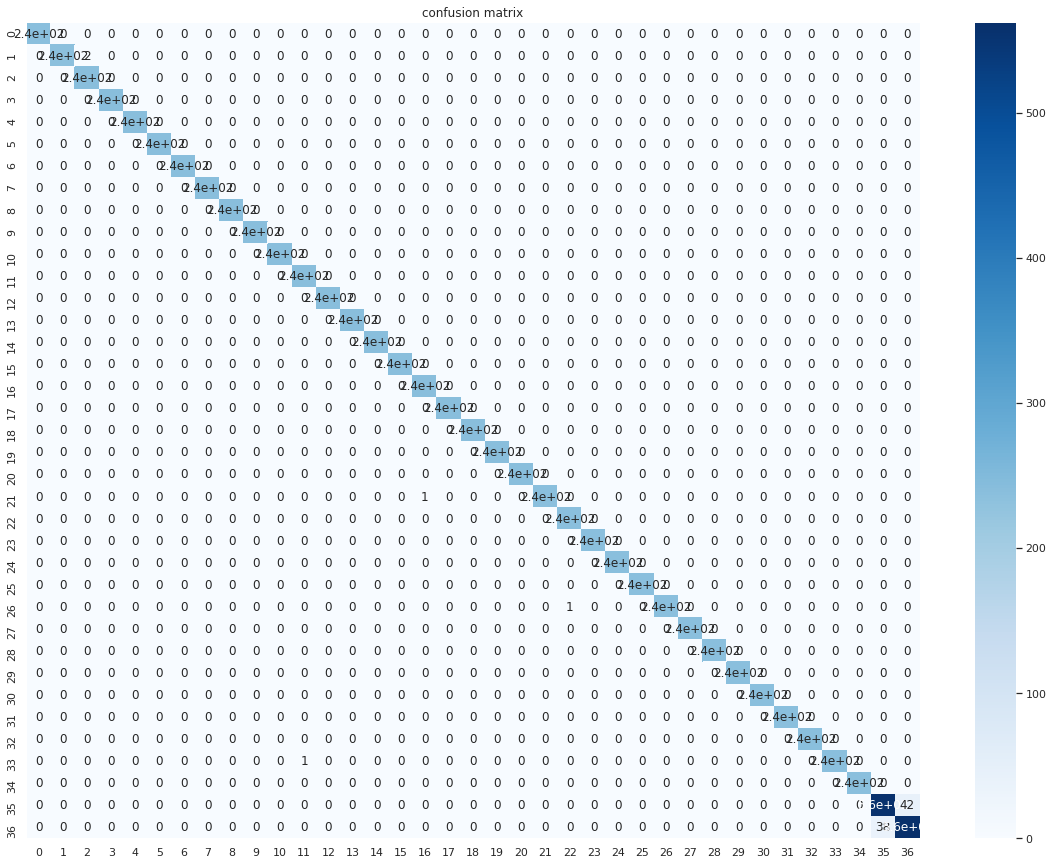

In [ ]:
#plotting the heatmap
sns.set()
fig=plt.gcf()
fig.set_size_inches(20,15)
#plot_confusion_matrix(test_data.classes, y_pred, classes = target_names)
sns.heatmap(confusion_mtx,annot=True,cmap='Blues')
plt.title("confusion matrix")
plt.show()

# Resnet50 Model

## import and training

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

resnet50_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
for layers in resnet50_model.layers:
  layers.trainable=False

In [ ]:
resnet50_model.summary()

In [ ]:
x = resnet50_model.output

x = GlobalAveragePooling2D()(x)

x=Flatten()(x)  #flatten the layer

x=Dense(2048,activation='relu')(x) # fully connected layer

x=Dropout(0.25)(x)  #25% dropout

x=Dense(2048,activation='relu')(x) #fully connected layer

x=Dropout(0.5)(x) #50 % dropout

x=Dense(len(train_data.class_indices),activation='softmax')(x)   
resnet50_model=Model(resnet50_model.input,x)

resnet50_model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
resnet50_history=resnet50_model.fit_generator(train_data,
                                              steps_per_epoch=train_data.samples/batchSize,
                                              epochs=10,
                                              validation_data=validation_data,
                                              validation_steps=validation_data.samples/batchSize,
                                              verbose=1,
                                              use_multiprocessing=True,
                                              workers=10
                                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1200/1200 [==============================] - 569s 443ms/step - loss: 3.3476 - accuracy: 0.0879 - val_loss: 2.8465 - val_accuracy: 0.1454
Epoch 2/10
1200/1200 [==============================] - 484s 400ms/step - loss: 2.7917 - accuracy: 0.1637 - val_loss: 2.4677 - val_accuracy: 0.2387
Epoch 3/10
1200/1200 [==============================] - 488s 403ms/step - loss: 2.5380 - accuracy: 0.2137 - val_loss: 2.6254 - val_accuracy: 0.1951
Epoch 4/10
1200/1200 [==============================] - 528s 437ms/step - loss: 2.3826 - accuracy: 0.2449 - val_loss: 2.1322 - val_accuracy: 0.3157
Epoch 5/10
1200/1200 [==============================] - 477s 394ms/step - loss: 2.2668 - accuracy: 0.2745 - val_loss: 2.1081 - val_accuracy: 0.3064
Epoch 6/10
1200/1200 [==============================] - 474s 392ms/step - loss: 2.1735 - accuracy: 0.2957 - val_loss: 2.0199 - val_accuracy: 0.3324
Epoch 7/10
1200/1200 [==============================] - 474s 392ms/step - loss: 2.1117 - accuracy: 0.3117 - val_

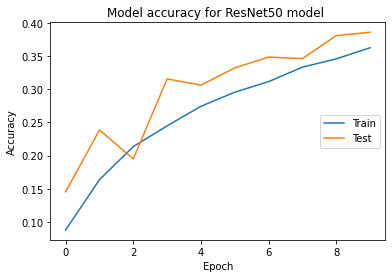

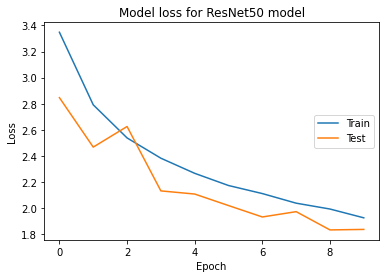

In [ ]:
plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('Model accuracy for ResNet50 model ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc= 'center right')
plt.show()


plt.plot(resnet50_history.history['loss'])
plt.plot(resnet50_history.history['val_loss'])
plt.title('Model loss for ResNet50 model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
saved_model_path = "/content/drive/MyDrive/resnet50_model"
resnet50_model.save(saved_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/resnet50_model/assets


## evaluation and metrics

In [ ]:
resnet50_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/resnet50_model')

In [ ]:
resnet50_model.evaluate_generator(
    generator=validation_data,
    steps=valid_num//batchSize
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.8046373128890991, 0.3955894708633423]

In [ ]:
test_data=datagen.flow_from_directory(train_path,
                                      target_size=imageSize,
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=False)

Found 9585 images belonging to 37 classes.


In [ ]:

Y_pred = resnet50_model.predict_generator(test_data, valid_num // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_mtx=confusion_matrix(test_data.classes, y_pred)
print(confusion_mtx)
print('Classification Report')
target_names = list(test_data.class_indices.keys())
print(classification_report(test_data.classes, y_pred, target_names=target_names))




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 77   0   0 ...  45   0   0]
 [  1  93   2 ...   1   0   0]
 [  0   6  89 ...   0   1   2]
 ...
 [  3   0   1 ... 123   0   1]
 [  0   0   0 ...   0 158 440]
 [  0   0   0 ...   0 118 480]]
Classification Report
              precision    recall  f1-score   support

           1       0.64      0.32      0.43       239
           2       0.36      0.39      0.37       239
           3       0.62      0.37      0.46       240
           4       0.54      0.60      0.57       240
           5       0.65      0.84      0.73       240
           6       0.57      0.20      0.30       240
           7       0.65      0.18      0.29       240
           8       0.44      0.57      0.50       240
           9       0.35      0.35      0.35       240
           A       0.56      0.17      0.27       240
           B       0.32      0.60      0.41       240
           C       0.24      0.14      0.18       240
           D       0.38      0.45      0.41       240
           E

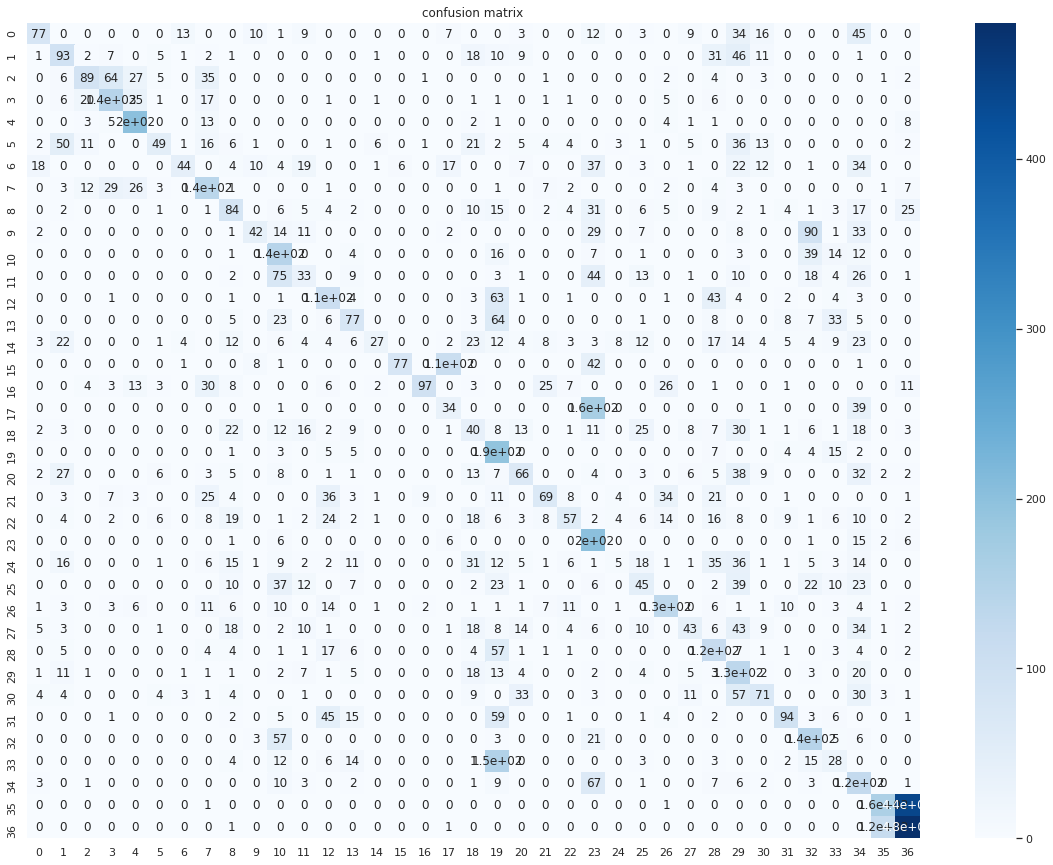

In [ ]:
#plotting the heatmap
sns.set()
fig=plt.gcf()
fig.set_size_inches(20,15)
#plot_confusion_matrix(test_data.classes, y_pred, classes = target_names)

sns.heatmap(confusion_mtx,annot=True,cmap='Blues')
plt.title("confusion matrix")
plt.show()

# comparision 

In [ ]:
model=["base_line","VGG16","Inception_v3","Mobilenet_V2","Resnet50"]
accuracy=[93.55,97.93,97.82,99.18,39.55]


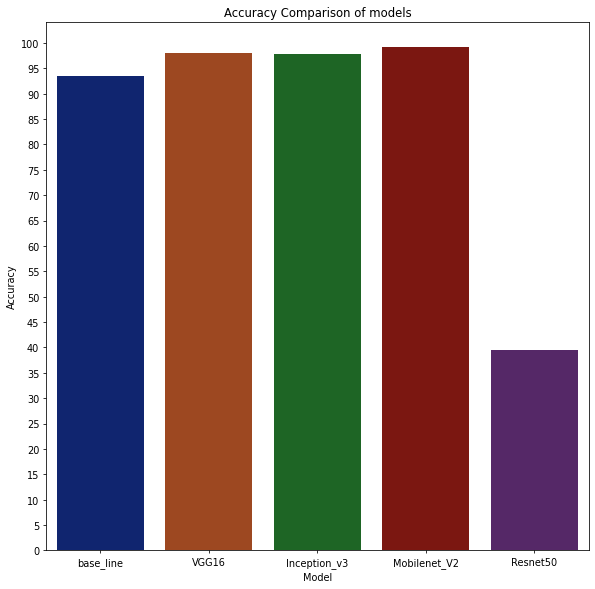

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
plt.figure(figsize=[10,10],dpi = 70)
plt.title('Accuracy Comparison of models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0,105,5))
sns.barplot(y =accuracy ,x=model,palette='dark')
plt.show()

# zipping files

In [ ]:
from zipfile import ZipFile 
import os 

def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths     

# path to folder which needs to be zipped 
directory = '/content/drive/MyDrive/sign_recognizer/'

# calling function to get all file paths in the directory 
file_paths = get_all_file_paths(directory) 

# printing the list of all files to be zipped 
print('Following files will be zipped:') 
for file_name in file_paths: 
    print(file_name) 

# writing files to a zipfile 
with ZipFile('saved_models.zip','w') as zip: 
    # writing each file one by one 
    for file in file_paths: 
        zip.write(file) 

print('All files zipped successfully!')

Following files will be zipped:
/content/drive/MyDrive/sign_recognizer/saved_model.pb
/content/drive/MyDrive/sign_recognizer/keras_metadata.pb
/content/drive/MyDrive/sign_recognizer/variables/variables.data-00000-of-00001
/content/drive/MyDrive/sign_recognizer/variables/variables.index
All files zipped successfully!
